In [1]:
import qiskit
from gate_variants.toffoli_variants import CCX_Variant_Gate
from qiskit.compiler import transpile

In [2]:
qc_0 = qiskit.circuit.QuantumCircuit(12)
qc_0.append(CCX_Variant_Gate(variant_tag=('01','02','s')),[0,1,2])
qc_0.append(CCX_Variant_Gate(variant_tag=('12','01','s')),[3,4,5])
qc_0.append(CCX_Variant_Gate(variant_tag=('02','01','p')),[6,7,8])
qc_0.append(CCX_Variant_Gate(variant_tag=('01','12','p')),[9,10,11])

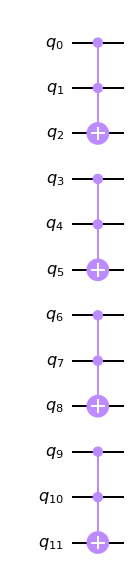

In [3]:
qc_0.draw(output = 'mpl')

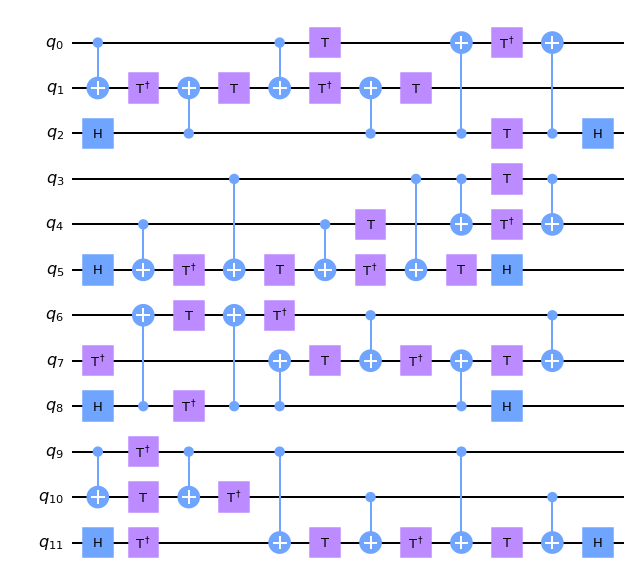

In [4]:
basis_gate_set = ['id', 'rz', 'sx', 'x', 'cx', 'reset']
trans_qc0 = transpile(qc_0, optimization_level=3)
trans_qc0.draw(output='mpl')

In [7]:
#benchmark is copied from https://github.com/jmbaker94/quantumcircuitbenchmarks/tree/master/quantumcircuitbenchmarks
import qiskit

def cuccaro_adder(c, cin, a, b, cout):
    def _maj(reg):
        c.cx(reg[2], reg[1])
        c.cx(reg[2], reg[0])
        c.ccx(reg[0], reg[1], reg[2])
        
    def _uma_parallel(reg):
        c.x(reg[1])
        c.cx(reg[0], reg[1])
        c.toffoli(reg[0], reg[1], reg[2])
        c.x(reg[1])
        c.cx(reg[2], reg[0])
        c.cx(reg[2], reg[1])
        
    _maj([cin, b[0], a[0]])
    
    for i in range(1, len(b)):
        _maj([a[i-1], b[i], a[i]])
        
    c.cx(a[-1], cout)
    
    for i in reversed(range(1, len(b))):
        _uma_parallel([a[i-1], b[i], a[i]])

    _uma_parallel([cin, b[0], a[0]])


def generate_cuccaro_adder(n):
    '''
        n: total size of circuit (each register is (n-2) / 2 sized)
    '''
    if n % 2 != 0:
        raise ValueError('Odd number of qubits')
        
    c = qiskit.circuit.QuantumCircuit(n)
        
    qs = list(range(n))
    cin = qs[0]
    cout = qs[-1]
    a = qs[1:int(n / 2)]
    b = qs[int(n / 2):-1]
    cuccaro_adder(c, cin, a, b, cout)
    return c

In [14]:
circuit = generate_cuccaro_adder(4)

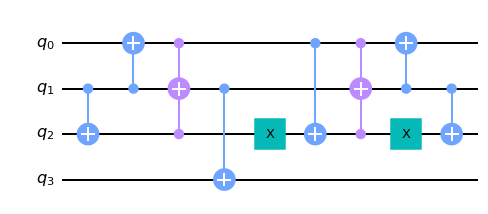

In [15]:
circuit.draw(output = 'mpl')

In [16]:
trans_orign = transpile(circuit, optimization_level=3, basis_gates = basis_gate_set)

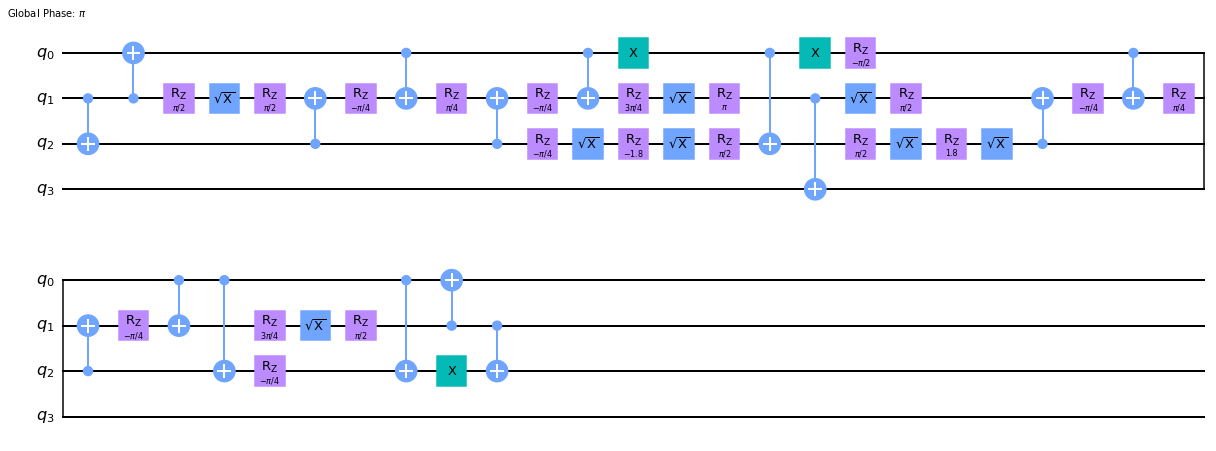

In [17]:
trans_orign.draw(output = 'mpl')

In [18]:
trans_orign.count_ops()

OrderedDict([('rz', 20), ('cx', 16), ('sx', 8), ('x', 3)])

In [19]:
qc = qiskit.circuit.QuantumCircuit(4)
qc.cx(1,2)
qc.cx(1,0)
qc.append(CCX_Variant_Gate(variant_tag=('02','01','p')),[0,2,1])
qc.cx(1,3)
qc.x(2)
qc.cx(0,2)
qc.append(CCX_Variant_Gate(variant_tag=('01','02','s')),[0,2,1])
qc.cx(1,0)
qc.x(2)
qc.cx(1,2)

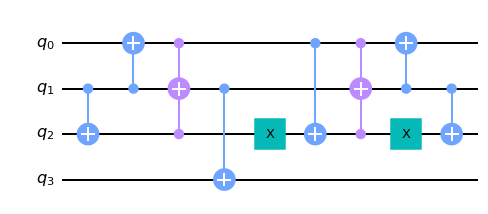

In [20]:
qc.draw(output = "mpl")

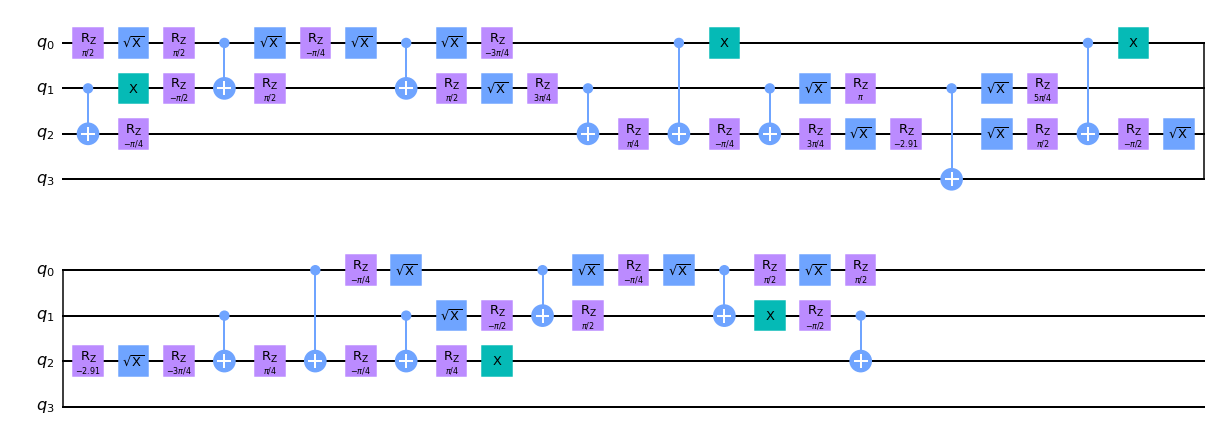

In [22]:
trans_qc = transpile(qc, optimization_level=3, basis_gates=basis_gate_set)
trans_qc.draw(output='mpl')

In [23]:
trans_qc.count_ops()

OrderedDict([('rz', 29), ('sx', 16), ('cx', 14), ('x', 5)])

In [24]:
trans_orign.count_ops()

OrderedDict([('rz', 20), ('cx', 16), ('sx', 8), ('x', 3)])

In [25]:
#CNOT reduction
1-14/16

0.125